
 =====
### Author: Stephanie Lo 
#### Date: 3.17.2023

# Table of Contents 



In [ ]:
%pip install XGBoost

In [52]:
#importing base packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os 
import time 
import boto3

In [53]:
# Instantiate an S3 client
s3_client = boto3.client('s3')

# Check
s3_client

In [ ]:
#instantiating the client
s3 = boto3.client('s3')

# Setting the bucket and file name 
bucket_name = 'deliverable-slo-bstn-bucket'
file_path = 'clean_data.csv'

# Use the S3 client to get the object

response = s3.get_object(Bucket=bucket_name, Key=file_path)
# Read the object data into a Pandas DataFrame
df_combined = pd.read_csv(response['Body'])

In [3]:
#Setting figure size & background 
plt.rcParams['figure.figsize'] = (8.0, 6.0)
sns.set_theme(style="darkgrid")

## 1.Introduction <a id="Intro"></a>

In [ ]:
df_combined = df_combined.drop(columns ="Unnamed: 0")
df_combined


In [6]:
#directing to the right file path
#os.chdir("/Users/mac/Desktop/Data/CAPSTONE/clean/")
#cwd = os.getcwd() 

In [7]:
#reading in the datasets
#df_combined = pd.read_csv("clean_data.csv")

#df_combined.head(2)

,Unnamed: 0,overall,vote,verified,reviewText,trending_asin,price_USD,ranking,product_description,also_buy_counts,...,m_Pureology,m_RUSK,m_Red Flower,m_Rene Furterer,m_Stila,m_StriVectin,m_TS,m_The Art of Shaving,m_Vichy,m_theBalm
0,0,5.0,0.0,1,Bought for my daughter.,0,30.0,4324.0,After a long day of handling thorny situations...,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5.0,0.0,1,Great cream for the skin.,0,30.0,4324.0,After a long day of handling thorny situations...,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
isNumeric = df_combined.select_dtypes('number')
short_isNumeric = isNumeric.iloc[:,:8]

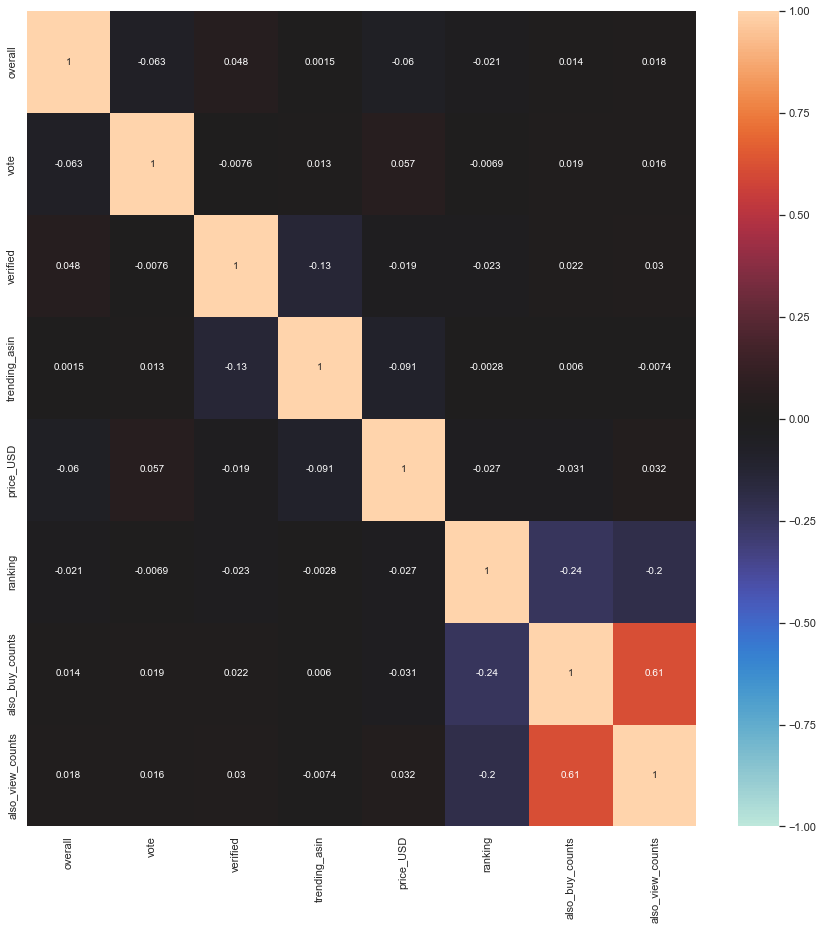

In [109]:
plt.figure(figsize=(15,15))
sns.heatmap(short_isNumeric.corr(), annot=True, center=0, vmin=-1, vmax=1)
plt.show()

In [ ]:
!cp  "/content/drive/MyDrive/colab/Capstone/Clean/clean_data2.csv" "clean_data.csv" 

cp: cannot stat '/content/drive/MyDrive/colab/Capstone/Clean/clean_data2.csv': No such file or directory


#### Null and Duplicate Check

In [8]:
print(f"The final data shape has {df_combined.shape[0]} columns and {df_combined.shape[1]} rows") 

The final data shape has 139348 columns and 63 rows


In [9]:


df_combined= df_combined.drop(columns = "Unnamed: 0")

In [10]:
#only taking numerical values 
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139348 entries, 0 to 139347
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   overall               139348 non-null  float64
 1   vote                  139348 non-null  float64
 2   verified              139348 non-null  int64  
 3   reviewText            139348 non-null  object 
 4   trending_asin         139348 non-null  int64  
 5   price_USD             139348 non-null  float64
 6   ranking               139348 non-null  float64
 7   product_description   139348 non-null  object 
 8   also_buy_counts       139348 non-null  float64
 9   also_view_counts      139348 non-null  float64
 10  c_accessories         139348 non-null  float64
 11  c_bath and shower     139348 non-null  float64
 12  c_fragance            139348 non-null  float64
 13  c_haircare            139348 non-null  float64
 14  c_makeup              139348 non-null  float64
 15  

Let's just quickly check for any null values and duplicates quickly: 

In [11]:
#null values check 
print(f"null values = {df_combined.isna().sum()}")

null values = overall                 0
vote                    0
verified                0
reviewText              0
trending_asin           0
                       ..
m_StriVectin            0
m_TS                    0
m_The Art of Shaving    0
m_Vichy                 0
m_theBalm               0
Length: 62, dtype: int64


In [12]:
df_combined = df_combined.dropna()
df_combined

,overall,vote,verified,reviewText,trending_asin,price_USD,ranking,product_description,also_buy_counts,also_view_counts,...,m_Pureology,m_RUSK,m_Red Flower,m_Rene Furterer,m_Stila,m_StriVectin,m_TS,m_The Art of Shaving,m_Vichy,m_theBalm
0,5.0,0.0,1,Bought for my daughter.,0,30.00,4324.0,After a long day of handling thorny situations...,56.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,1,Great cream for the skin.,0,30.00,4324.0,After a long day of handling thorny situations...,56.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0,"Maybe Im just not familiar with this brand, bu...",0,30.00,4324.0,After a long day of handling thorny situations...,56.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.0,1,This is one of my favorite creams. Highly reco...,0,30.00,4324.0,After a long day of handling thorny situations...,56.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,1,"I simply love this lotion! Originally, I rece...",0,30.00,4324.0,After a long day of handling thorny situations...,56.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139343,2.0,0.0,1,Meh! Flat iron works better,0,21.29,171884.0,Thermally activated smoothing treatment combin...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
139344,1.0,0.0,1,It doesn't grip the hair - I'm very disappointed.,0,21.29,171884.0,Thermally activated smoothing treatment combin...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
139345,4.0,0.0,1,Really works! I have curly hair and you can ge...,0,21.29,171884.0,Thermally activated smoothing treatment combin...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
139346,1.0,0.0,1,DIDNT STRAIGHTEN HAIR,0,21.29,171884.0,Thermally activated smoothing treatment combin...,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139348 entries, 0 to 139347
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   overall               139348 non-null  float64
 1   vote                  139348 non-null  float64
 2   verified              139348 non-null  int64  
 3   reviewText            139348 non-null  object 
 4   trending_asin         139348 non-null  int64  
 5   price_USD             139348 non-null  float64
 6   ranking               139348 non-null  float64
 7   product_description   139348 non-null  object 
 8   also_buy_counts       139348 non-null  float64
 9   also_view_counts      139348 non-null  float64
 10  c_accessories         139348 non-null  float64
 11  c_bath and shower     139348 non-null  float64
 12  c_fragance            139348 non-null  float64
 13  c_haircare            139348 non-null  float64
 14  c_makeup              139348 non-null  float64
 15  

Looks like the dataset is completely clean so let's move onto the modeling.

## 2. Modeling <a id="Modeling"></a>

In [116]:
#loading the modules 

# Scalars
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

# To make our sets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA


# The classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

Creating 2 models one with and one without the product description column, let's call them df_with_prod and df

In [25]:
df_with_desc = df_combined.copy()
df = df_combined.copy()

In [26]:
#dropping remaining text columns
columns = ['product_description']
for column in columns: 
     df= df_combined.drop([column],axis=1)

In [28]:
df.sample(2)

,overall,vote,verified,reviewText,trending_asin,price_USD,ranking,also_buy_counts,also_view_counts,c_accessories,...,m_Pureology,m_RUSK,m_Red Flower,m_Rene Furterer,m_Stila,m_StriVectin,m_TS,m_The Art of Shaving,m_Vichy,m_theBalm
91440,5.0,0.0,1,I have horrible hormonal cystic acne on my fac...,0,31.99,3055.0,72.0,79.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96171,5.0,0.0,1,I love this stuff. I was using the MDSolarSci...,0,32.00,5880.0,17.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Working with just the review df

In [29]:
#for Train test split
from sklearn.model_selection import train_test_split
y = df_combined["trending_asin"]
remainder1, test1  = train_test_split(df, test_size=0.3, stratify= y, random_state = 8)
print(f"Remainder shape {remainder1.shape}")
print(f"Test shape {test1.shape}")

Remainder shape (97543, 61)
Test shape (41805, 61)


In [54]:
#for Train test split
from sklearn.model_selection import train_test_split
y_sample = remainder1["trending_asin"]
remainder1_sample, none1 = train_test_split(remainder1, test_size=0.8, stratify= y_sample, random_state = 8)
print(f"Remainder sample shape {remainder1_sample.shape}")
print(f"Test shape {none1.shape}")

Remainder sample shape (19508, 61)
Test shape (78035, 61)


In [55]:
y_remainder1_sample = remainder1_sample["trending_asin"]
X_remainder1_sample = remainder1_sample.drop(["trending_asin"],axis=1)

In [30]:
#assigning remainder dataset for X and y 
y_remainder1 = remainder1["trending_asin"]
X_remainder1  = remainder1.drop(["trending_asin"],axis=1)

In [31]:
#assigning train dataset for X and y 
y_test1 = test1["trending_asin"]
X_test1  = test1.drop(["trending_asin"],axis=1)

In [32]:
#for train/validation split 
from sklearn.model_selection import train_test_split

X_train1, X_val1, y_train1, y_val1 = train_test_split(X_remainder1, y_remainder1, test_size=0.3, random_state=1, stratify=y_remainder1)
print(f"Train shape {X_train1.shape}")
print(f"Validation shape {X_val1.shape}")

Train shape (68280, 60)
Validation shape (29263, 60)


In [33]:
print('Proportions in original data:')
print(y.value_counts(normalize=True), '\n')

print('Proportions in remainder set:')
print(y_remainder1.value_counts(normalize=True), '\n')

print('Proportions in test set:')
print(y_test1.value_counts(normalize=True), '\n')

print('Proportions in train set:')
print(y_train1.value_counts(normalize=True), '\n')

print('Proportions in validation set:')
print(y_val1.value_counts(normalize=True), '\n')

Proportions in original data:
0    0.888574
1    0.111426
Name: trending_asin, dtype: float64 

Proportions in remainder set:
0    0.888572
1    0.111428
Name: trending_asin, dtype: float64 

Proportions in test set:
0    0.888578
1    0.111422
Name: trending_asin, dtype: float64 

Proportions in train set:
0    0.888576
1    0.111424
Name: trending_asin, dtype: float64 

Proportions in validation set:
0    0.888562
1    0.111438
Name: trending_asin, dtype: float64 



### Splitting out model 2

In [34]:
#for Train test split
from sklearn.model_selection import train_test_split
y = df_combined["trending_asin"]
remainder2, test2  = train_test_split(df_with_desc, test_size=0.3, stratify= y, random_state = 8)
print(f"Remainder shape {remainder2.shape}")
print(f"Test shape {test2.shape}")

Remainder shape (97543, 62)
Test shape (41805, 62)


In [35]:
#assigning remainder dataset for X and y 
y_remainder2 = remainder2["trending_asin"]
X_remainder2  = remainder2.drop(["trending_asin"],axis=1)

In [36]:
#assigning train dataset for X and y 
y_test2 = test2["trending_asin"]
X_test2  = test2.drop(["trending_asin"],axis=1)

In [37]:
#for train/validation split 
from sklearn.model_selection import train_test_split

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_remainder2, y_remainder2, test_size=0.3, random_state=2, stratify=y_remainder2)
print(f"Train shape {X_train2.shape}")
print(f"Validation shape {X_val2.shape}")

Train shape (68280, 61)
Validation shape (29263, 61)


## Review and Description Analysis 

How might we determine what is the best method to apply to our columns of review summaries and description? 

## PCA

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english",#removing stop words
                             min_df=0.03,
                             max_features= 2000,       
                             )    

# 2. Fit 
bagofwords.fit(X_remainder1['reviewText'])

# 3. Transform
remainder_transformed = bagofwords.transform(remainder1['reviewText'])
remainder_transformed

<97543x65 sparse matrix of type '<class 'numpy.int64'>'
	with 423478 stored elements in Compressed Sparse Row format>

In [39]:
#making into an array
remainder_transformed.toarray().sum(axis=0)
remainder_transformed.shape

(97543, 65)

In [40]:
review_word_counts = pd.DataFrame(
    {"words": bagofwords.get_feature_names_out(),
    "counts": remainder_transformed.toarray().sum(axis=0)
     }
).sort_values("counts", ascending=False).reset_index().drop(columns = "index")

In [41]:
review_word_counts["words"] = 'r_' + review_word_counts['words'].astype(str)


In [42]:
review_vect_df = pd.DataFrame(remainder_transformed.todense(), columns= review_word_counts["words"])
review_vect_df

words,r_product,r_hair,r_love,r_great,r_skin,r_use,r_like,r_good,r_just,r_color,...,r_apply,r_definitely,r_try,r_worth,r_looks,r_goes,r_smooth,r_think,r_soft,r_feels
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97540,0,0,0,1,1,1,0,0,0,0,...,1,1,2,0,1,0,1,0,0,0
97541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
X_remainder1_pca = pd.concat([X_remainder1.reset_index(drop=True), review_vect_df.reset_index(drop=True)], axis=1).drop(columns = 'reviewText')
X_remainder1_pca.sample(2)

,overall,vote,verified,price_USD,ranking,also_buy_counts,also_view_counts,c_accessories,c_bath and shower,c_fragance,...,r_apply,r_definitely,r_try,r_worth,r_looks,r_goes,r_smooth,r_think,r_soft,r_feels
68639,5.0,0.0,1,14.0,52221.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
50227,4.0,0.0,1,12.0,9112.0,13.0,14.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#scaling data 
scaler_pca = StandardScaler()
scaler_pca.fit(X_remainder1_pca)
feature_scaled = scaler_pca.transform(X_remainder1_pca)

#applying PCA 
pca1 = PCA(n_components=4)
pca1.fit(feature_scaled)
feature_scaled_pca = pca1.transform(feature_scaled)
print(f"shape of scaled and features with applied PCA is {np.shape(feature_scaled_pca)}")

shape of scaled and features with applied PCA is (97543, 4)


In [45]:
#variance to see which out of the 4 components are contributing most
feat_var = np.var(feature_scaled_pca, axis=0)
feat_var_rat = feat_var/(np.sum(feat_var))

print(f"variance Ratio of the 4 principal components analysis: {feat_var_rat}")

print(sum(feat_var_rat[0:3]))

variance Ratio of the 4 principal components analysis: [0.47247088 0.20034694 0.18259631 0.14458586]
0.8554141392073837


### How to process text data?

In [50]:
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)

vectorizer = CountVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(2, 2),
                              min_df = 0.01)  # only bigrams
vectorized = vectorizer.fit_transform(X_remainder1['reviewText'])
pd.DataFrame(vectorized.toarray(), 
             columns=vectorizer.get_feature_names_out())

,after using,all day,all the,and does,and doesn,and has,and have,and love,and not,and the,...,works great,works well,worth the,years and,you are,you can,you have,your face,your hair,your skin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
97541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF 

In [51]:
from sklearn.feature_extraction.text import (CountVectorizer, 
                                             TfidfVectorizer,
                                             TfidfTransformer)

vectorizer = TfidfVectorizer(analyzer='word', 
                              token_pattern=r'\b[a-zA-Z]{3,}\b',  
                              ngram_range=(2, 2),
                              min_df = 0.01)  # only bigrams
vectorized = vectorizer.fit_transform(X_remainder1['reviewText'])
pd.DataFrame(vectorized.toarray(), 
             columns=vectorizer.get_feature_names_out())

,after using,all day,all the,and does,and doesn,and has,and have,and love,and not,and the,...,works great,works well,worth the,years and,you are,you can,you have,your face,your hair,your skin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.540145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97538,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
97539,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
97540,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.602043,0.0
97541,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [63]:
review_word_counts_TFIDF = pd.DataFrame(
    {"words": vectorizer.get_feature_names_out(),
    "counts": vectorized.toarray().sum(axis=0)
     }
).sort_values("counts", ascending=False).reset_index().drop(columns = "index")

In [64]:
review_word_counts_TFIDF

,words,counts
0,this product,5088.781478
1,love this,4707.565899
2,great product,2532.613917
3,the best,2369.733561
4,and the,2178.265576
...,...,...
101,the other,506.302426
102,when you,494.207032
103,because the,493.501642
104,you are,493.434429


In [70]:
#count vectorizer function
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer


cv = ColumnTransformer([
        ('TFIDF', TfidfVectorizer(min_df=6, max_features=None, strip_accents='unicode', 
                                  analyzer="word", token_pattern=r'\w{1,}', ngram_range=(1, 2)), 'reviewText')
    ],
    remainder='passthrough'
)



In [77]:
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
cachedir = mkdtemp()

#we give our estimators as a list of tuples: name:function.
pipe_vec = [('vectorize', cv)]
pipe_vec_test = Pipeline(pipe_vec,verbose=4, memory=cachedir)


In [79]:
Xtr = pipe_vec_test.fit_transform(X_remainder1)
vec = pipe_vec_test.named_steps['vectorize']
features = vec.get_feature_names_out()


[Pipeline] ......... (step 1 of 1) Processing vectorize, total=  13.5s


In [81]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [83]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
#Top tfidf features in specific document (matrix row) 
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [89]:
top_feats_in_doc(Xtr, features, 1, top_n=25)

,feature,tfidf
0,remainder__ranking,752.000000
1,remainder__price_USD,10.000000
2,remainder__overall,5.000000
3,remainder__m_Other,1.000000
4,remainder__c_skincare,1.000000
5,remainder__verified,1.000000
6,TFIDF__cost,0.129623
7,TFIDF__that,0.120972
8,TFIDF__old razor,0.118558
9,TFIDF__purchase price,0.117056


### Using stemming 

In [24]:
"""
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs
    """

"\ndef top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):\n    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value\n        calculated across documents with the same class label. '''\n    dfs = []\n    labels = np.unique(y)\n    for label in labels:\n        ids = np.where(y==label)\n        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)\n        feats_df.label = label\n        dfs.append(feats_df)\n    return dfs\n    "

## Setting up pipeline

In [121]:
df.head(2)

,overall,vote,verified,reviewText,trending_asin,price_USD,ranking,also_buy_counts,also_view_counts,c_accessories,...,m_Pureology,m_RUSK,m_Red Flower,m_Rene Furterer,m_Stila,m_StriVectin,m_TS,m_The Art of Shaving,m_Vichy,m_theBalm
0,5.0,0.0,1,Bought for my daughter.,0,30.0,4324.0,56.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.0,1,Great cream for the skin.,0,30.0,4324.0,56.0,48.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
num_features = ['overall', 'vote', 'verified',
       'price_USD', 'ranking', 'also_buy_counts', 'also_view_counts']

In [123]:
num_features = df.select_dtypes(include=['int64','float64']).columns
num_features = num_features.drop("trending_asin")

In [124]:
#count vectorizer function
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer


ct = ColumnTransformer([
        ('cv', CountVectorizer( stop_words="english",min_df=0.05), 'reviewText'),
        ('scale' , StandardScaler(), num_features)
    ],
    remainder='passthrough'
)

# 2. Fit 
ct.fit(X_remainder1_sample)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cv',
                                 CountVectorizer(min_df=0.05,
                                                 stop_words='english'),
                                 'reviewText'),
                                ('scale', StandardScaler(),
                                 Index(['overall', 'vote', 'verified', 'price_USD', 'ranking',
       'also_buy_counts', 'also_view_counts', 'c_accessories',
       'c_bath and shower', 'c_fragance', 'c_haircare', 'c_makeup',
       'c_menscare', 'c_nails and hands', 'c...
       'm_Glo Skin', 'm_Jane Iredale', 'm_Japonesque', 'm_Julep',
       'm_L'occitane ', 'm_LAFCO', 'm_LORAC', 'm_La Roche Posay',
       'm_Laura Geller', 'm_Mario Badescu', 'm_Mustela', 'm_NUXE',
       'm_Natura Bisse', 'm_OPI', 'm_Oribe', 'm_Other', 'm_PCA Skin',
       'm_Paul Mitchell', 'm_Pureology', 'm_RUSK', 'm_Red Flower',
       'm_Rene Furterer', 'm_Stila', 'm_StriVectin', 'm_TS',
       'm_The Art of Shaving', 'm_Vichy', 'm_theBalm'],
      dtype='object'))])

In [125]:
# 3. Transform
X_remainder_cv = ct.transform(X_remainder1_sample)
X_remainder_cv.shape

(19508, 91)

In [127]:
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from sklearn import svm

# Set up a directory to cache the pipeline results

cachedir = mkdtemp()

#we give our estimators as a list of tuples: name:function.
pipe_svm = [('transform', ct),
           ('dim_reducer', PCA() ),
            ('scaler', StandardScaler()),
            ('clf', SVC(random_state=10))]

pipe = Pipeline(pipe_svm,verbose=4, memory=cachedir)


In [ ]:
#pipe.fit(X_train, y_train) #change to X_train, y_train

#pipe.score(X_val, y_val)

NameError: ignored

In [110]:
#figuring out params
# pipe.get_params()

## Grid Search

Let's label the initial pieces like the min_df features that will apply across the each model:

In [113]:
vectorize_mindf_list = [0.03,0.04,0.05]
pca_n_components = [0.95,0.90,0.85,0.80]

Since I have an imbalanced data set it would be good to look at F1 score, the harmonic mean between recall and precision

#### Logistic Regression

In [ ]:
# Range of c-values 
c_values = [.001 ,0.1, 1, 10, 100, 1000]

In [ ]:
# Parameter grid
log_param_grid = [
  
      # l2 without PCA
    {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'scaler' : ['passthrough', StandardScaler(with_mean=False),MinMaxScaler()],
     'dim_reducer': ['passthrough'],
     'clf': [LogisticRegression(solver='lbfgs', random_state=8, n_jobs=-1,max_iter=10000)],
     'clf__C': c_values
    },
    #l2 with PCA
     {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'scaler' : ['passthrough', StandardScaler(with_mean=False),MinMaxScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': pca_n_components, 
     'clf': [LogisticRegression(solver='lbfgs', random_state=8, n_jobs=-1,max_iter=10000)],
     'clf__C': c_values
    },
   
     #L1 without PCA 
    {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'scaler': [StandardScaler(), MinMaxScaler()], 
     'dim_reducer': ['passthrough'],
     'clf' : [LogisticRegression(solver = 'liblinear', penalty='l1', random_state=8, n_jobs=-1,max_iter=10000)],
     'clf__C': c_values }
]

In [ ]:
#logistic grid search set up 
log_gs = RandomizedSearchCV(estimator = pipe, 
                           param_distributions= log_param_grid, 
                           cv=5, 
                           n_jobs = 1,
                           n_iter = 100,
                           verbose = 3,
                           refit=True,
                           scoring = 'f1_micro', 
                           random_state = 8)

fitted_log_gs = log_gs.fit(X_remainder1, y_remainder1)

grid_search_results = fitted_log_gs.cv_results_

best_estimator = fitted_log_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Pipeline] ......... (step 1 of 4) Processing transform, total=   1.9s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  23.9s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.903 total time=  28.0s
[Pipeline] ......... (step 1 of 4) Processing transform, total=   1.9s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  23.9s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.900 total time=  28.0s
[Pipeline] ......... (step 1 of 4) Processing transform, total=   1.9s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  24.4s
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.902 total time=  28.5s
[Pipeline] ......... (step 1 of 4) Processing transform, total=   1.9s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  24.3s
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.899 total time=  28.4s
[Pipeline] ......... (step 1 of 4) Processing transform, total=   1.9s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  23.4s
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.901 total time=  27.4s
[Pipeline] ......... (step 1 of 4) Processing transform, total=   1.9s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.5s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=  17.9s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=1, dim_reducer=PCA(), dim_reducer__n_components=0.95, scaler=passthrough, transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.903 total time=  22.6s
[Pipeline] ......... (step 1 of 4) Processing transform, total=   1.9s
[Pipeline] ....... (step 2 of 4) Pro

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  53.2s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.903 total time=  54.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  36.7s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.899 total time=  38.0s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  45.3s
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.902 total time=  46.7s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  46.9s
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.899 total time=  48.2s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  49.7s
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.901 total time=  51.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   5.6s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.1, dim_reducer=PCA(), dim_reducer__n_components=0.85, scaler=passthrough, transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.904 total time=   6.6s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   5.5s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.1, dim_reducer

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.903 total time=   1.4s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.900 total time=   1.4s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.902 total time=   1.4s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.900 total time=   1.4s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.901 total time=   1.4s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   2.0s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.001, dim_reducer=PCA(), dim_reducer__n_components=0.95, scaler=passthrough, transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.904 total time=   3.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   2.0s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.001, dim_re

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.5s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=0.001, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.893 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.5s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=0.001, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.895 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.6s
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=0.001, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.896 total time=   1.6s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.5s
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=0.001, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.895 total time=   1.6s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.6s
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=0.001, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.896 total time=   1.6s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   6.2s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.1, dim_reducer=PCA(), dim_reducer__n_components=0.95, scaler=StandardScaler(with_mean=False), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.903 total time=   7.3s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   7.3s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.1, dim_reducer=PCA(), dim_reducer__n_components=0.95, scaler=StandardScaler(with_mean=False), transform__cv__max_features=500, trans

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.4min
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.904 total time= 1.4min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.4min
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time= 1.4min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.5min
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time= 1.5min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.5min
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time= 1.5min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.5min
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time= 1.5min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   7.5s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(with_mean=False), transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.903 total time=   8.6s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   9.7s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=1, dim_reducer=passthr

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  15.8s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.904 total time=  16.9s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  14.5s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time=  15.6s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  11.5s
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time=  12.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  11.8s
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time=  12.8s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=  15.7s
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time=  16.7s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   5.4s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.1, dim_reducer=PCA(), dim_reducer__n_components=0.85, scaler=StandardScaler(with_mean=False), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.904 total time=   6.7s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   5.2s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.8min
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.904 total time= 1.8min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.8min
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time= 1.8min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 2.4min
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time= 2.4min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.1min
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time= 1.1min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 2.4min
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=10, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time= 2.4min
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   1.3s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.001, dim_reducer=PCA(), dim_reducer__n_components=0.8, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.889 total time=   2.6s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   1.0s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.001, dim_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.5s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.904 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.5s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.5s
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.3s
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=100, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time=   1.4s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.4min
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.904 total time= 1.4min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.4min
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time= 1.4min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.7min
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time= 1.8min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.4min
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time= 1.4min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.6min
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time= 1.6min
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=  58.7s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=100, dim_reducer=PCA(), dim_reducer__n_components=0.85, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.904 total time=  60.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=  33.2s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=100, dim_redu

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.904 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time=   1.4s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time=   1.5s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total=   0.4s
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=MinMaxScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time=   1.5s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s
[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.6min
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=1000, dim_reducer=PCA(), dim_reducer__n_components=0.95, scaler=StandardScaler(with_mean=False), transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.902 total time= 1.6min
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s
[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.5min
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), c

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.4min
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.904 total time= 1.4min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.4min
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time= 1.4min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.5min
[CV 3/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time= 1.5min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.5min
[CV 4/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.900 total time= 1.5min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


[Pipeline] ............... (step 4 of 4) Processing clf, total= 1.5min
[CV 5/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', random_state=8,
                   solver='liblinear'), clf__C=1000, dim_reducer=passthrough, scaler=StandardScaler(), transform__cv__max_features=500, transform__cv__min_df=0.03;, score=0.902 total time= 1.5min
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   3.4s
[CV 1/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.001, dim_reducer=passthrough, scaler=StandardScaler(with_mean=False), transform__cv__max_features=500, transform__cv__min_df=0.04;, score=0.905 total time=   4.4s
[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   3.0s
[CV 2/5] END clf=LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8), clf__C=0.001, dim_reduce

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:359: UserWarning: Persisting input arguments took 0.55s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.9s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.1s
[Pipeline] ............... (step 4 of 4) Processing clf, total=   9.5s


In [ ]:
def write_results_to_s3(cv_results, filename, bucket, key):
    """
    Write a DataFrame of grid search results to a CSV file and upload it to an S3 bucket.

    Args:
    - cv_results: A DataFrame of grid search results.
    - filename: The name of the CSV file to write the results to.
    - bucket: The name of the S3 bucket to upload the file to.
    - key: The S3 key to use for the uploaded file.

    Returns:
    - None
    """
    # Write the results to a CSV file
    grid_search_results.to_csv(filename, index=False)

    # Upload the file to S3
    s3_client = boto3.client('s3')
    s3_client.upload_file(Filename=filename, Bucket=bucket, Key=key)

     print(f"{filename} has been saved to {bucket}")



In [ ]:
# Example usage
write_results_to_s3(grid_search_results, 'log_results_model_1.csv', 'deliverable-slo-bstn-bucket', 'log_results_model_1.csv')

In [ ]:
#calling the file
log_results_model_1

In [ ]:
import joblib
import boto3

def save_best_model(best_estimator, filename, bucket='deliverable-slo-bstn-bucket', key=None):
    """
    Save the best estimator from a grid search to a joblib file and upload it to an S3 bucket (optional).

    Args:
    - best_estimator: The best estimator from a scikit-learn grid search.
    - filename: The name of the file to save the best estimator to.
    - bucket (optional): The name of the S3 bucket to upload the file to (if provided).
    - key (optional): The S3 key to use for the uploaded file (if provided).

    Returns:
    - None
    """
    joblib.dump(best_estimator, filename)

    if bucket is not None and key is not None:
        s3_client = boto3.client('s3')
        s3_client.upload_file(Filename=filename, Bucket=bucket, Key=key)

    print(f"{filename} has been saved to {bucket}")


In [ ]:
# saving logreg pickle file
save_best_model(best_estimator, 'pickled_best_log_reg1.pkl', bucket='deliverable-slo-bstn-bucket', key='pickled_best_log_reg1.pkl')

In [ ]:
# Sanity check on the pickled model
pickled_best_logreg = joblib.load(filename)

# Print the accuracies
print(f"The best logistic regression's accuracy on the remainder set: {pickled_best_logreg.score(X_remainder1, y_remainder1)}")
print(f"The best logistic regression's accuracy on the test set: {pickled_best_logreg.score(X_test1, y_test1)}")


The best logistic regression's accuracy on the remainder set: 0.903509221574075
The best logistic regression's accuracy on the test set: 0.9040784595144121


#### Support Vector Machine

Best results with standard scaler so far

In [117]:
#hyper parameters SVM
param_range =[0.1,1,10]
gamma_range = [0.1,0.01]

In [119]:
# Parameter grid
svm_param_grid = [
    # SVM  without PCA
    {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'scaler' : ['passthrough', StandardScaler(with_mean=False)],
     'dim_reducer': ['passthrough'],
     'clf' : [SVC(random_state=10)],
     'clf__kernel': ['rbf','sigmoid'],
     'clf__C': param_range,
     'clf__gamma':gamma_range
     },
     
     #SVM with PCA
     {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'scaler' : [StandardScaler(with_mean=False)],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components':[0.95 ,0.9 ,0.8],
      'clf' : [SVC(random_state=10)], 
     'clf__kernel': ['rbf','sigmoid'],
     'clf__C': param_range,
     'clf__gamma':gamma_range
     }
]


In [128]:
#activating randomized grid search 
svm_random = RandomizedSearchCV(estimator = pipe, 
                           param_distributions= svm_param_grid, 
                           cv=5, 
                           n_iter = 100,
                           verbose = 6,
                           refit=True,
                           scoring = 'f1_micro', 
                           random_state = 8)

fitted_svmrandom_gs = svm_random.fit(X_remainder1_sample, y_remainder1_sample)

grid_search_results = fitted_svmrandom_gs.cv_results_

best_estimator = fitted_svmrandom_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[Pipeline] ......... (step 1 of 4) Processing transform, total=   1.0s


/Users/mac/opt/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/pipeline.py:359: UserWarning: Persisting input arguments took 1.13s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=  43.0s
[CV 1/5] END clf=SVC(random_state=10), clf__C=1, clf__gamma=0.1, clf__kernel=rbf, dim_reducer=passthrough, scaler=passthrough, transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.922 total time= 1.0min
[Pipeline] ......... (step 1 of 4) Processing transform, total=   0.7s


/Users/mac/opt/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/pipeline.py:359: UserWarning: Persisting input arguments took 0.69s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=  46.2s
[CV 2/5] END clf=SVC(random_state=10), clf__C=1, clf__gamma=0.1, clf__kernel=rbf, dim_reducer=passthrough, scaler=passthrough, transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.924 total time=  59.8s
[Pipeline] ......... (step 1 of 4) Processing transform, total=   0.7s


/Users/mac/opt/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/pipeline.py:359: UserWarning: Persisting input arguments took 0.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[Pipeline] ....... (step 2 of 4) Processing dim_reducer, total=   0.0s
[Pipeline] ............ (step 3 of 4) Processing scaler, total=   0.0s
[Pipeline] ............... (step 4 of 4) Processing clf, total=  40.4s
[CV 3/5] END clf=SVC(random_state=10), clf__C=1, clf__gamma=0.1, clf__kernel=rbf, dim_reducer=passthrough, scaler=passthrough, transform__cv__max_features=500, transform__cv__min_df=0.05;, score=0.921 total time=  52.0s


KeyboardInterrupt: 

In [ ]:
# saving results to s3 bucket
write_results_to_s3(grid_search_results, 'svm_results_random_model1.csv', 'deliverable-slo-bstn-bucket', 'svm_results_random_model1.csv')

Best parameters: 
- min_df = 0.05 
- PCA(0.95)
- Param_clf = rbf 
- Scaler = StandardScaler()

In [ ]:
#more refined parameters
# Parameter grid
svm_param_grid2 = [ 
     #SVM with PCA
     {'transform__cv__min_df' : [0.05],
     'transform__cv__max_features': [500],
     'scaler' : [StandardScaler(with_mean=False)],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components':[0.95 ,0.92,0.90],
      'clf' : [SVC(random_state=10)], 
     'clf__kernel': ['rbf'],
     'clf__C': [10,1],
     'clf__gamma':[1,0.1]
     }
]

In [ ]:
#more refined grid search
svm_gs = GridSearchCV(estimator = pipe, 
                           param_grid= svm_param_grid2, 
                           cv=5, 
                           verbose = 4,
                           refit=True,
                           scoring = 'f1_micro', 
                           random_state = 8)

fitted_svm_gs = svm_gs.fit(X_remainder1, y_remainder1)

grid_search_results = fitted_svm_gs.cv_results_

best_estimator = fitted_svm_gs.best_estimator_
print(best_estimator)

In [1]:
# saving svmreg pickle file
save_best_model(best_estimator, 'pickled_best_svm_model1.pkl', bucket='deliverable-slo-bstn-bucket', key='pickled_best_svm_model1.pkl')

ModuleNotFoundError: No module named 'boto3'

In [ ]:
# Sanity check on the pickled model
pklfilename = 'pickled_best_svm_model1.pkl'

pickled_best_svm1 = joblib.load(pklfilename)

# Print the accuracies
print(f"The best SVM accuracy on the remainder set: {pickled_best_svm1.score(X_remainder1, y_remainder1)}")
print(f"The best SVM accuracy on the test set: {pickled_best_svm1.score(X_val1, y_val1)}")


### Random Forest Model 

In [ ]:
#hyper parameters Random Forest 
n_estimators_range = list(range(100,1600,200))
max_depth_range = list(range(10,50,10))
max_features_range = np.arange(0.2,0.6,0.8)

In [ ]:
# Parameter grid

rf_param_grid = [
    # Random Forest without PCA
    {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'dim_reducer': ['passthrough'],
     'scaler' : ['passthrough'],
     'clf': [RandomForestClassifier(n_jobs = 1)],
     'clf__max_depth': max_depth_range,
     'clf__n_estimators':n_estimators_range,
     'clf__max_features' :max_features_range
     },
     
     #Random Forest with PCA
     {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'scaler' : ['passthrough'],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components':[0.95, 0.8], 
     'clf': [RandomForestClassifier(n_jobs = 1)],
     'clf__max_depth': max_depth_range,
     'clf__n_estimators':n_estimators_range,
     'clf__max_features' :max_features_range
     }
]

In [ ]:
#activating grid search 
rf_random = RandomizedSearchCV(estimator = pipe, 
                           param_distributions= rf_param_grid, 
                           cv=5, 
                           n_iter = 75,
                           verbose = 4,
                           refit=True,
                           scoring = 'f1_micro', 
                           random_state = 8)

fitted_rf_gs = rf_random.fit(X_remainder1_sample, y_remainder1_sample)

grid_search_results = fitted_rf_gs.cv_results_

best_estimator = fitted_rf_gs.best_estimator_

In [ ]:
#calling the save function
write_results_to_s3(grid_search_results, 'rf_random_results_model_1.csv', 'deliverable-slo-bstn-bucket', 'rf_random_results_model_1.csv')

In [ ]:
#more refined grid search to total train set 


In [ ]:
#more refined grid search to total train set 

In [ ]:
# saving random forest pickle file
save_best_model(best_estimator, 'pickled_best_rf_model1.pkl', bucket='deliverable-slo-bstn-bucket', key='pickled_best_rf_model1.pkl')

In [ ]:
# Sanity check on the pickled model

filename = 'pickled_best_rf_reg1.pkl'
pickled_best = joblib.load(filename)

# Print the accuracies
print(f"The best Random Forest accuracy on the remainder set: {pickled_best.score(X_train1, y_train1)}")
print(f"The best Random Forest accuracy on the validation set: {pickled_best.score(X_val1, y_val1)}")


1. A Random Forest works by fitting several deep decision trees. Each tree is fitted to a random subset of the data and features. The trees are trained in parallel and their decisions are totally independent of each other. The only thing we can control for is the depth of the trees and number of trees we fit. 

### XGBOOST Model

2. Boosting-based methods work by fitting one model at a time. Each subsequent model is fitted to correct for the mistakes made by the previous models. In addition to the number of models and their complexity, we can control for how strong of a correction each model makes.

In [90]:
#hyper parameters XGBoost 

gamma_range = [i/10.0 for i in range(0,5)]
# Percentage of columns to be randomly samples for each tree
colsample_bytree_range = [i/10.0 for i in range(3,10)]
 # Maximum depth of the tree, increasing it increases the model complexity
max_depth_range = list(range(3,21,3))
  # Learning rate shrinks the weights to make the boosting process more conservative
learning_rate_range = [0.01 , 0.1, 1] 

In [ ]:
# Parameter grid

boost_param_grid = [
    # boost without PCA
    {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'scaler' : ['passthrough'],
     'dim_reducer': ['passthrough'],
     'clf': [XGBClassifier()],
     'clf__gamma': gamma_range,
     'clf__colsample_bytree':colsample_bytree_range,
     'clf__max_depth':max_depth_range,
     'clf__learning_rate' :learning_rate_range
     },
     
     #boost with PCA
     {'transform__cv__min_df' : vectorize_mindf_list ,
     'transform__cv__max_features': [500],
     'scaler' : ['passthrough'],
     'dim_reducer': [XGBClassifier()],
     'dim_reducer__n_components':[0.95, 0.8], 
     'clf': [XGBClassifier()],
     'clf__gamma': gamma_range,
     'clf__colsample_bytree':colsample_bytree_range,
     'clf__max_depth':max_depth_range,
     'clf__learning_rate' :learning_rate_range
     }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

#activating grid search 
boost_random = RandomizedSearchCV(estimator = pipe, 
                           param_distributions= boost_param_grid, 
                           cv=5, 
                           n_iter = 60,
                           verbose = 4,
                           refit=True,
                           scoring = 'f1_micro', 
                           random_state = 8)

fitted_boost_random = boost_random.fit(X_remainder1_sample, y_remainder1_sample)


grid_search_results = fitted_boost_random.cv_results_

best_estimator = fitted_boost_random.best_estimator_

In [98]:
#calling the save function
write_results_to_s3(grid_search_results, 'boost_random_results_model_1.csv', 'deliverable-slo-bstn-bucket', 'boost_random_results_model_1.csv')

NameError: name 'boost_random' is not defined

In [97]:
s3_client.upload_file(Filename='boost_random_results_model_1.csv',
                  Bucket='deliverable-slo-bstn-bucket',
                  Key='boost_random_results_model_1.csv')

NameError: name 'boost_random_results_model_1' is not defined

In [ ]:
#more refined grid search with train sample


In [ ]:
# saving random forest pickle file
save_best_model(best_estimator, 'pickled_best_boost_model1.pkl', bucket='deliverable-slo-bstn-bucket', key='pickled_best_boost_model1.pkl')

In [ ]:
# Sanity check on the pickled model
pickled_best_boost1 = joblib.load('pickled_best_boost_reg1.pkl')

# Print the accuracies
print(f"The best XGBoost accuracy on the remainder set: {pickled_best_boost1.score(X_train1, y_train1)}")
print(f"The best XGBoost accuracy on the validation set: {pickled_best_boost1.score(X_val1, y_val1)}")


In [ ]:
#figuring out baseline to compare against
pct = 100 - (y_train.sum()/y_train.shape[0]*100)
print(f"Number of review in the training dataset that have trending products: {y_train.sum()} which means our baseline for the model is: {round(pct,4)}%")

## Count Vectorizer

We will start by inputting a count vectorizer on the model for the review data. 

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
train["length"]=train["reviewText"].apply(length)

In [ ]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

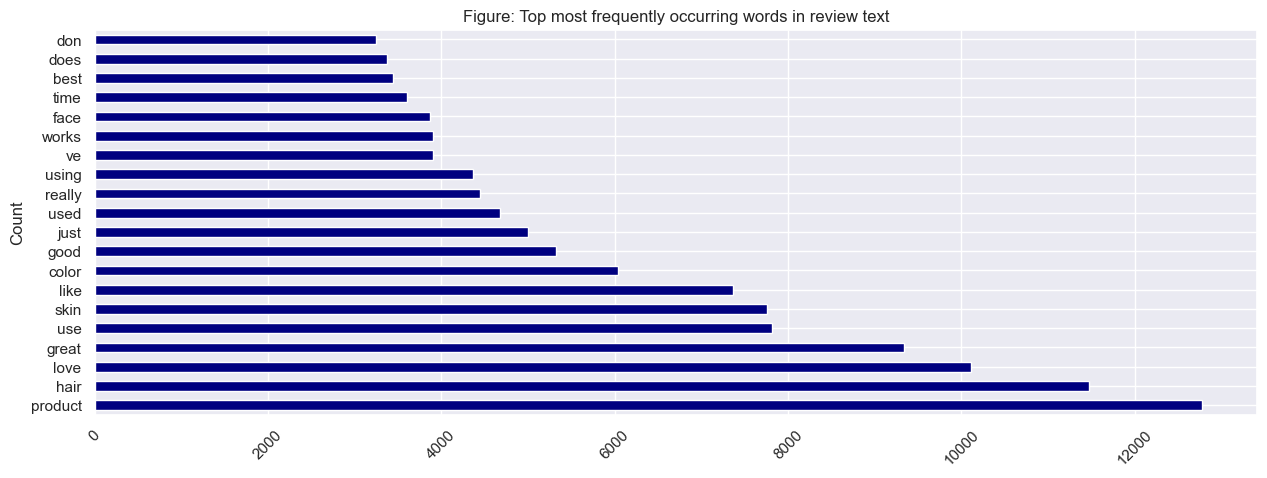

In [ ]:
#plotting it out

pos_word_counts = pd.DataFrame(
    {"counts": train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

pos_word_counts.head(20).plot(kind="barh", figsize=(15, 5), legend=False, color = "navy")
plt.title("Figure: Top most frequently occurring words in review text")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
review_vect_df = pd.DataFrame(train_transformed.todense(), columns= review_word_counts["words"])
review_vect_df

words,r_product,r_hair,r_love,r_great,r_use,r_skin,r_like,r_color,r_good,r_just,...,r_bit,r_easy,r_looks,r_got,r_need,r_definitely,r_worth,r_smooth,r_goes,r_favorite
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
42594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
42595,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
trending_graph = pd.concat([train["trending_asin"].reset_index(drop=True), review_vect_df.reset_index(drop=True)], axis=1)

In [ ]:
columns = trending_graph.columns[trending_graph.columns.str.startswith('r_')]

In [ ]:
#show graph with different count vectorizer counts, melt function (transpose, trending ,non-trending )
df = pd.pivot_table(trending_graph, index = "trending_asin",aggfunc = "sum").T
df= df.reset_index()
df= df.sort_values(by=1, ascending=False).head(15)
df

trending_asin,index,0,1
58,r_way,6330,1430
9,r_cream,11544,1231
7,r_buy,9070,1039
18,r_easy,6835,976
16,r_don,3039,827
40,r_polish,6594,775
62,r_years,8566,773
30,r_little,4752,572
23,r_good,5511,529
48,r_smell,4512,489


In [ ]:
df["total"] = df[0]+df[1]
df[0]= df[0]/df["total"]
df[1]= df[1]/df["total"]

In [ ]:
df = df.rename({'index': 'word', 0: 'not trending', 1: 'trending'}, axis=1)
df = df.drop(columns='total')


In [ ]:
df = df.melt(id_vars = 'word').rename(columns = str.title)

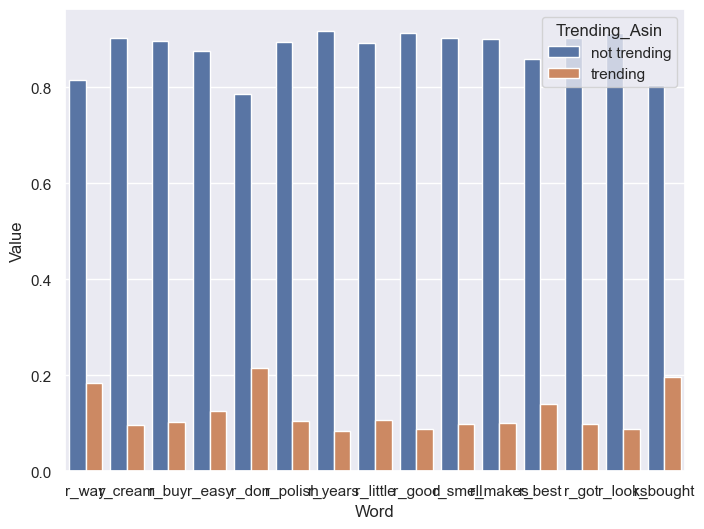

In [ ]:
sns.barplot(x='Word',y='Value', hue='Trending_Asin', data = df)
plt.show()

In [ ]:
#concatenating review vector to train 
train = pd.concat([train.reset_index(drop=True), review_vect_df.reset_index(drop=True)], axis=1)
train.sample(2)

,overall,vote,verified,asin,reviewText,summary,year,month,trending_asin,title,...,r_bit,r_easy,r_looks,r_got,r_need,r_definitely,r_worth,r_smooth,r_goes,r_favorite
7982,5.0,0.0,1,B000142FVW,nice color and OPI is high quality nail enamel,Five Stars,2016,7,0,OPI Nail Lacquer Not So Bora Bora ing Pink ...,...,0,0,0,0,0,0,0,0,0,0
7370,1.0,2.0,1,B006RBR7NO,Caused a rash all over my face.,Threw it away!,2017,12,1,Bioderma Sensibio H O Micellar Water Cleansin...,...,0,0,0,0,0,0,0,0,0,0


### count vectorizer on review headline description

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
review_len=train[train['trending_asin']==1]['reviewText'].str.len()
ax1.hist(review_len,color='blue',bins=100)
ax1.set_title('Trending Products')
tweet_len=train[train['trending_asin']==0]['reviewText'].str.len()
ax2.hist(review_len,color='red',bins=100)
ax2.set_title('Non Trending products')
fig.suptitle('Characters in Review Text')
plt.show()

In [ ]:
train.columns

Index(['overall', 'vote', 'verified', 'asin', 'reviewText', 'summary', 'year',
       'month', 'trending_asin', 'title',
       ...
       'r_bit', 'r_easy', 'r_looks', 'r_got', 'r_need', 'r_definitely',
       'r_worth', 'r_smooth', 'r_goes', 'r_favorite'],
      dtype='object', length=133)

In [ ]:
### count vectorizer on review headline description
bagofwords = CountVectorizer(min_df = 0.05).fit(train["product_description"])
small_transformed = bagofwords.transform(train["product_description"])

my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=small_transformed.toarray())
display(my_df)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,039,090d845f,10,1000,1000_pt0_sx300__,15,17200,1981,20,200,...,women,work,works,world,worldwide,year,years,yet,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
42595,1,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,1,0
42596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#starting TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 0.05, max_features= 200
                         ).fit(train["product_description"])
small_transformed = tfidf.transform(train["product_description"])



In [ ]:
my_df = pd.DataFrame(columns=(f"d_{tfidf.get_feature_names()}"), data=small_transformed.toarray())
display(my_df)

In [ ]:
tfidf

TfidfVectorizer(max_features=200, min_df=0.05)

In [ ]:
my_df = pd.DataFrame(columns=tfidf.get_feature_names(), data=small_transformed.toarray())
display(my_df)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,039,1000,1000_pt0_sx300__,_blank,_cr0,_sl220__,_sl300__,acid,after,all,...,which,while,will,with,without,world,worldwide,years,you,your
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.101884,...,0.000000,0.063490,0.0,0.034358,0.078736,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.119753,...,0.000000,0.000000,0.0,0.161538,0.000000,0.000000,0.0,0.0,0.123912,0.000000
2,0.000000,0.0,0.0,0.0,0.203939,0.0,0.0,0.000000,0.000000,0.000000,...,0.071004,0.000000,0.0,0.081673,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.070864,...,0.000000,0.000000,0.0,0.047795,0.000000,0.000000,0.0,0.0,0.000000,0.070410
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.059267,0.041532,...,0.219174,0.000000,0.0,0.112047,0.000000,0.000000,0.0,0.0,0.042974,0.041266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42593,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.077114,0.0,0.292119,0.000000,0.000000,0.0,0.0,0.064022,0.000000
42594,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.066395,...,0.116794,0.000000,0.0,0.179123,0.000000,0.094017,0.0,0.0,0.000000,0.000000
42595,0.062414,0.0,0.0,0.0,0.000000,0.0,0.0,0.076332,0.057536,0.040319,...,0.070924,0.050250,0.0,0.108774,0.000000,0.057093,0.0,0.0,0.041719,0.000000
42596,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.118066,0.000000,0.049576,0.0,0.0,0.036226,0.000000


In [ ]:
description_counts_train = pd.DataFrame(
    columns=['d_' + col for col in tfidf.get_feature_names()], # add 'p_' to the start of each column name
    index=X_train.index # keep original train index to ensure matching with the numeric data
)
description_counts_train 

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,d_039,d_1000,d_1000_pt0_sx300__,d__blank,d__cr0,d__sl220__,d__sl300__,d_acid,d_after,d_all,...,d_which,d_while,d_will,d_with,d_without,d_world,d_worldwide,d_years,d_you,d_your
81887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### count vectorizer on review title headline

In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer

# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english",#removing stop words
                             min_df=0.02,
                             max_features= 2000,        #showing up in minimum 10% of documents     #only selecting 100 columns  
                             )    

# 2. Fit 
bagofwords.fit(train['summary'])

# 3. Transform
train_transformed = bagofwords.transform(train['summary'])
train_transformed

<42598x12 sparse matrix of type '<class 'numpy.int64'>'
	with 34281 stored elements in Compressed Sparse Row format>

In [ ]:
#making into an array
train_transformed.toarray().sum(axis=0)
train_transformed.shape

(42598, 12)

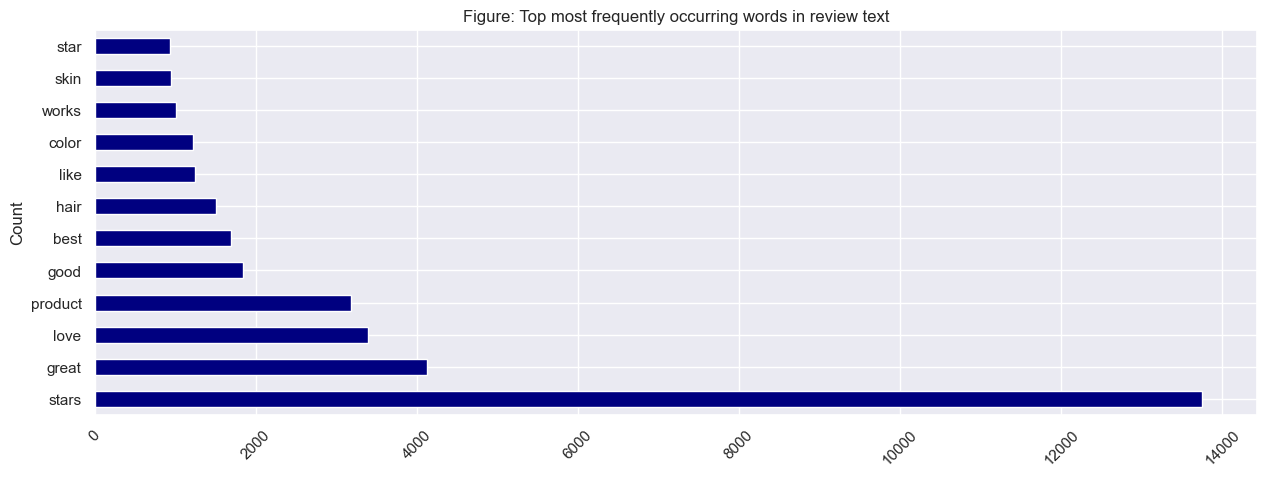

In [ ]:
#plotting it out

pos_word_counts = pd.DataFrame(
    {"counts": train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

pos_word_counts.head(20).plot(kind="barh", figsize=(15, 5), legend=False, color = "navy")
plt.title("Figure: Top most frequently occurring words in review text")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### count vectorizer on description headline

Porter stemmer

In [ ]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
# library to clean data
import re
 
#to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    '''
    Custom tokernizer for preprocessing. 
    
    Input: string, raw document
    Output:  
    
    '''
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    ps = PorterStemmer()
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = ps.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

In [ ]:
sentence  = "the quick fox jumped over the lazy dog"

In [ ]:
my_tokenizer(sentence)

['quick', 'fox', 'jump', 'lazi', 'dog']

In [ ]:
train, test  = train_test_split(combined_df, test_size=0.3, stratify= y, random_state = 8)

In [ ]:
train_review = train["reviewText"]
test_review = test["reviewText"]

In [ ]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer=my_tokenizer)
bagofwords.fit(train_review)

X_train_transformed = bagofwords.transform(train_review)
X_test_transformed = bagofwords.transform(test_review)

X_train_transformed.shape

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(97722, 7343)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


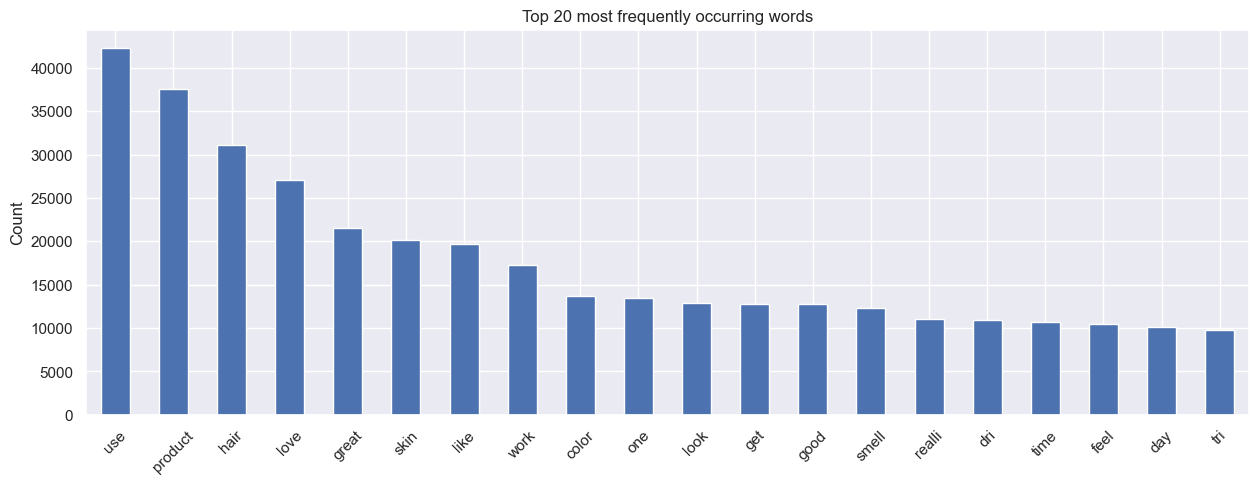

In [ ]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

bi-grams 

Let's refit our best parameters to the model: 

In [ ]:
fitted_logreg.best_params_

{'model': LogisticRegression(max_iter=10000, n_jobs=-1, random_state=8),
 'model__C': 0.1,
 'normalise': RobustScaler(),
 'reduce_dim': None}

From our final data set with log transformation we can see that the best hyper parameters have remained the same. 

Let's fit this to our final model and see the test accuracy score: 

In [ ]:
# Get class predictions
y_pred = logreg2.predict(X_test_rs)

#classification
from sklearn.metrics import classification_report

report_logreg = classification_report(y_test, y_pred)
print(report_logreg)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1809
           1       0.79      0.84      0.82      2458

    accuracy                           0.78      4267
   macro avg       0.78      0.77      0.77      4267
weighted avg       0.78      0.78      0.78      4267



In the end we have dropped the accuracy score by 0.3% but increased our f1-score by 0.01 so we may need to make a few more tweaks but overall we can say that our model can predict sentiment given logistic regression. 